In [5]:
from dotenv import load_dotenv, dotenv_values
config = dotenv_values('.env')
config = dict(config)

import tweepy
import nltk

api_key = config['APIKEY']
api_secrets = config['APIKEYSECRET']
bearer_token = config['BEARERTOKEN']
access_token = config['ACCESSTOKEN']
access_token_secret = config['ACCESSTOKENSECRET']

auth = tweepy.OAuthHandler(api_key,api_secrets)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)
try:
    api.verify_credentials()
    print('-------------------------\nSuccessful Authentication\n-------------------------')
except:
    print('-------------------------\nFailed authentication\n-------------------------')

-------------------------
Successful Authentication
-------------------------


We download the NTLK libraries and import the emotion lexicon

In [6]:
nltk.download('wordnet')
nltk.download('sentiwordnet')
nltk.download('punkt')

from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
def get_emotions(tweet):
    emotions = {"anger": 0, "fear": 0, "joy": 0, "sadness": 0}
    tokens = word_tokenize(tweet)
    for token in tokens:
        synsets = wn.synsets(token)
        if synsets:
            synset = synsets[0]
            senti_synset = swn.senti_synset(synset.name())
            emotions["anger"] += senti_synset.obj_score() + senti_synset.neg_score()
            emotions["fear"] += senti_synset.neg_score()
            emotions["joy"] += senti_synset.pos_score()
            emotions["sadness"] += abs(senti_synset.neg_score() - senti_synset.obj_score())
    return emotions


In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import requests
from LeXmo import LeXmo     

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


The Percentage of Emotions in Tweets are: 
{'anger': 49, 'fear': 1, 'joy': 1, 'sadness': 47}


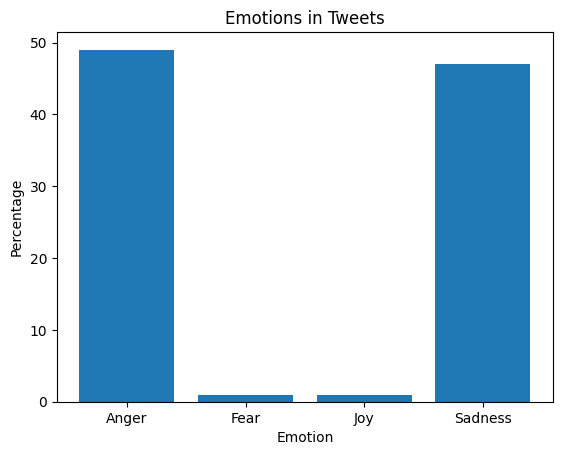

In [12]:
query = "(Graham Potter)lang:en"
tweets = tweepy.Cursor(api.search_tweets,
                           q=query,
                           lang="en",
                           tweet_mode="extended").items(100)


emotions = {"anger": 0, "fear": 0, "joy": 0, "sadness": 0}
emot = {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'negative': 0, 'positive': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}

total_words = 0
word = []
for tweet in tweets:
    text = tweet.full_text
    tweet_words = word_tokenize(text)
    word+=tweet_words
    total_words += len(tweet_words)
    tweet_emotions = get_emotions(text)
    # emo=LeXmo.LeXmo(text)
    # emo.pop('text', None)
    # emot.update(emo)
    # for emotion in emot:
    #     emot[emotion] += emo[emotion]
    for emotion in emotions:
        emotions[emotion] += tweet_emotions[emotion]

percentages = {}

for emotion in emotions:
    percentages[emotion] = round(emotions[emotion] / total_words * 100)

labels = ["Anger", "Fear", "Joy", "Sadness"]
values = [percentages["anger"], percentages["fear"], percentages["joy"], percentages["sadness"]]

print("The Percentage of Emotions in Tweets are: ")
print(percentages)

plt.bar(labels, values)
plt.title("Emotions in Tweets")
plt.xlabel("Emotion")
plt.ylabel("Percentage")
plt.show()


In [ ]:
# perc = {}

# for emotion in emot:
#     perc[emotion] = ((emot[emotion] / total_words)*100)

# print("The Percentage of Emotions in Tweets are: ")
# print(perc)

# labels = ["Anger", "Anticipation", "Disgust", "Fear", "Joy", "Negative", "Positive", "Sadness", "Surprise", "Trust"]
# values = [perc["anger"], perc["anticipation"], perc["disgust"], perc["fear"], perc["joy"], perc["negative"], perc["positive"], perc["sadness"], perc["surprise"], perc["trust"]]
# plt.bar(labels, values)
# plt.title("Emotions in Tweets")

# plt.xlabel("Emotion")
# plt.ylabel("Percentage")
# plt.show()



In [ ]:

labels = ["Anger", "Fear", "Joy", "Sadness"]
values = [emotions["anger"], emotions["fear"], emotions["joy"], emotions["sadness"]]

plt.bar(labels, values)
plt.title("Emotions in Tweets")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()
